In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so 
#that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a 
#variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there 
#are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude 
#and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes 
#and longitudes into the coordinates list before moving on.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

fortuna us
tsihombe mg
mys shmidta ru
khatanga ru
puerto ayora ec
tupik ru
dzhusaly kz
ushuaia ar
bluff nz
saint-philippe re
kondinskoye ru
albany au
vostok ru
lebu cl
namibe ao
esperance au
belushya guba ru
port macquarie au
saint-philippe re
tuktoyaktuk ca
albany au
mahebourg mu
vaini to
kapaa us
basco ph
hermanus za
new norfolk au
jizan sa
barrow us
port blair in
sentyabrskiy ru
bonthe sl
atuona pf
carnarvon au
belushya guba ru
east london za
yellowknife ca
evensk ru
saleaula ws
ballina au
narsaq gl
peniche pt
west bay ky
illoqqortoormiut gl
eureka us
chokurdakh ru
bredasdorp za
katsuura jp
carnarvon au
luwingu zm
cabo san lucas mx
tuktoyaktuk ca
east london za
bambous virieux mu
vaitupu wf
ushuaia ar
neijiang cn
mataura pf
rikitea pf
amderma ru
rikitea pf
punta arenas cl
iqaluit ca
murgab tm
laguna br
sentyabrskiy ru
bengbu cn
pahrump us
bredasdorp za
huambo ao
vaini to
illoqqortoormiut gl
cape town za
nalut ly
hobart au
hasaki jp
atocha bo
hilo us
bluff nz
rikitea pf
khatanga ru
t

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

265

# Module 6.2.1: Understanding APIs


In [7]:
#Using an API has its limitations because not all information from a server is accessible. Most APIs have tiered services, 
#from free to paid. Free services allow access to limited information, and paid subscriptions provide more access based on 
#the payment plan. Our company has a paid subscription for APIs, but we can only get certain information from websites on 
#hotels such as location, accessibility, rooms, prices, services, and amenities, as well as regional weather data.

# Module 6.2.2: Get Started with OpenWeatherMap API

In [8]:
#Launch the Anaconda Prompt for your PythonData environment.
#After the Python prompt, >, type python to launch Python.
#At the Python prompt, >>>, type import requests and press Enter.
#On the next line type requests.__version__ and press Enter.
#The output should be version 2.22.0 or later.

# Module 6.2.4: Make an API Call
## Retrieve a Response Using the get() Method

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key+ "&q=" + "Boston"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

#The code output will be <Response [200]>, indicating a valid response. We won't see this code when a website appears in a 
#browser. However, when a website does not appear, we'll see a 404 code, indicating a client error. You can directly call 
#the response code with the get() method using the status_code. If we chain the status_code to the city_weather variable, 
#we get 200 as the output.

<Response [200]>

# Module 6.2.4: Get Data from a Response

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

#When we run this cell the output is "<Response [200]>."
#When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, 
#or HTML format. We can apply the format attributes to get the data into a useful format to parse.
#One format that provides a preview of the JSON data is the text attribute. Let's get the content for the Boston weather 
#data using the following code.

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text
#The text in the output is a dictionary of dictionaries and arrays, or a JSON file. We can work with this data, but it 
#might be more challenging if we needed to retrieve temperature (temp) and humidity ( humidity) from this output because 
#the data is in a sentence format.

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":51.94,"feels_like":47.84,"temp_min":48.2,"temp_max":55.99,"pressure":1022,"humidity":81},"visibility":10000,"wind":{"speed":5.75,"deg":100},"clouds":{"all":90},"dt":1616629953,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616582406,"sunset":1616626836},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 51.94,
  'feels_like': 47.84,
  'temp_min': 48.2,
  'temp_max': 55.99,
  'pressure': 1022,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 100},
 'clouds': {'all': 90},
 'dt': 1616629953,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616582406,
  'sunset': 1616626836},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Module 6.2.4: Handle Request Errors

In [16]:
#When we submit a get request for the city_weather, we want to make sure that we get a valid response, i.e., 200, before 
#we retrieve any data. To check if we get a valid response, we can write a conditional expression that will evaluate 
#whether the status code is equal to 200. If it is, then we can print out a statement that says the weather data was found. 
#If there is a response other than 200, we can print out a statement that says the weather was not found, as in the 
#following example:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
#When the conditional expression is evaluated, it will print City weather found if true, or City weather not found if false.
#When we run the cell code above, the output is City weather found.

City Weather found.


In [17]:
#However, if we type print(city_url) in a new cell and run the cell, the output will be a URL. If we click the URL, the 
#web browser returns a 404 response and there is no data to retrieve.
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston&q=Boston


# Module 6.2.5: Parse a Response from an API

In [18]:
#Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston. 
#First, correct the spelling for the city of Boston to get a valid URL
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 51.94,
  'feels_like': 47.84,
  'temp_min': 48.2,
  'temp_max': 55.99,
  'pressure': 1022,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 100},
 'clouds': {'all': 90},
 'dt': 1616629953,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616582406,
  'sunset': 1616626836},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
#let's assign a variable to the city_weather.json() data to the variable "boston_data" 
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
boston_data['sys']['country']

'US'

In [21]:
#If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable
boston_data["dt"]

1616629953

In [22]:
#Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, 
#percent cloudiness, and wind speed. Add the following code to a new cell and run the cell.

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 55.99 81 90 5.75


# Module 6.2.5: Convert the Date Timestamp

In [23]:
#Let's convert the date from the Boston weather data in the JSON format to the ISO format

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 24, 23, 52, 33)

# Module 6.2.6: Get the City Weather Data


In [24]:
#1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
#2. Loop through the cities list.
#3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    #Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4. Build the city_url or endpoint for each city.
#5. Log the URL and the record and set numbers.
#6. Make an API request for each city.
#7. Parse the JSON weather data for the following:
    #City, country, and date
    #Latitude and longitude
    #Maximum temperature
    #Humidity
    #Cloudiness
    #Wind speed
#8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

# 1. Import Dependencies, and Initialize an Empty List and Counters

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each 
#recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


# 2. Loop Through the List of Cities and Build the City URL

In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#Let's review the code:

#We parse the JSON file for the current city.
#If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
#If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness,
#wind speed, and date and assign those values to variables.
#We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but 
#since these parameters are always present in the response this won't be necessary.
#We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather 
#parameters.
#Finally, below the try block and after the except block, we add the closing print statement, which will let us know the 
#data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that 
#the print statements are flush with the margin.
#Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle 
#all errors encountered and to allow the program to continue.

Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tupik
Processing Record 7 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | kondinskoye
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | vostok
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | vaini
Processing Record 22 of S

Processing Record 39 of Set 4 | copala
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | labutta
City not found. Skipping...
Processing Record 42 of Set 4 | dekoa
City not found. Skipping...
Processing Record 43 of Set 4 | clarence town
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | jingdezhen
Processing Record 46 of Set 4 | zhigansk
Processing Record 47 of Set 4 | gao
Processing Record 48 of Set 4 | malwan
City not found. Skipping...
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | udachnyy
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | hammerfest
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | whithorn
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | asau
Processing Record 8 of Set 5 | katobu
Processing Record 9 of Set 5 | sinegorye
Processing Record 10 of Set 5 | 

In [29]:
# tally the number of cities in the city_data array
len(city_data)

238

# Module 6.2.7: Create a DataFrame of City Weather Data

In [30]:
#Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct 
#order, and exporting the DataFrame to a comma-separated (CSV) file.

#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,53.01,81,90,10.36,US,2021-03-25 00:02:13
1,Khatanga,71.9667,102.5000,-8.23,96,99,3.47,RU,2021-03-24 23:58:18
2,Puerto Ayora,-0.7393,-90.3518,80.01,87,32,1.01,EC,2021-03-24 23:57:42
3,Tupik,54.4253,119.9327,17.22,87,38,1.25,RU,2021-03-25 00:02:14
4,Ushuaia,-54.8000,-68.3000,42.80,75,20,36.82,AR,2021-03-24 23:56:31
5,Bluff,-46.6000,168.3333,60.01,79,16,1.99,NZ,2021-03-24 23:57:50
6,Saint-Philippe,-21.3585,55.7679,77.00,78,0,5.75,RE,2021-03-24 23:54:59
7,Kondinskoye,59.6481,67.4100,23.95,95,100,8.55,RU,2021-03-25 00:02:15
8,Albany,42.6001,-73.9662,52.00,84,100,4.00,US,2021-03-24 23:55:45
9,Vostok,46.4856,135.8833,29.35,73,47,2.84,RU,2021-03-25 00:02:15


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2021-03-25 00:02:13,40.5982,-124.1573,53.01,81,90,10.36
1,Khatanga,RU,2021-03-24 23:58:18,71.9667,102.5000,-8.23,96,99,3.47
2,Puerto Ayora,EC,2021-03-24 23:57:42,-0.7393,-90.3518,80.01,87,32,1.01
3,Tupik,RU,2021-03-25 00:02:14,54.4253,119.9327,17.22,87,38,1.25
4,Ushuaia,AR,2021-03-24 23:56:31,-54.8000,-68.3000,42.80,75,20,36.82
...,...,...,...,...,...,...,...,...,...
233,Hervey Bay,AU,2021-03-24 23:58:55,-25.2986,152.8535,80.60,50,0,5.75
234,Diffa,NE,2021-03-25 00:03:17,13.3154,12.6113,81.88,16,99,12.06
235,Wisconsin Rapids,US,2021-03-25 00:03:18,44.3836,-89.8174,44.60,87,90,13.80
236,Guadix,ES,2021-03-25 00:02:01,37.2993,-3.1392,48.00,46,1,1.99


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as 
#"City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

#We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we 
#move on to graphing and statistical analysis, let's update our GitHub repository.

# Module 6.3.1 Plot Latitude vs. Temperature

In [33]:
#We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities. 
#The students will use these scatter plots to write a summary report on how different weather parameters change based on 
#the latitude.

#We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. The first, latitude 
#vs. maximum temperature, should look like the following scatter plot.

#Note: Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter()

In [34]:
#Step 1: First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, 
#humidity, cloudiness, and wind speed from all the cities.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
#Step 2: Your final scatter plot will need the current date in the title. To add the current date, we will need to import
#the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python 
#library, so there is no need to install it.
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616634184.2145557

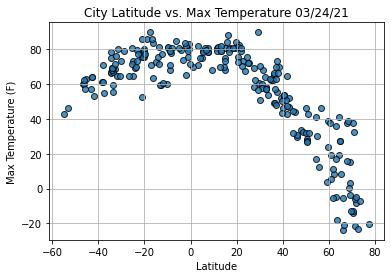

In [36]:
#The format for time appears like the datetime stamp for the JSON weather data. We can convert this using the string format
#method, strftime() and pass the formatting parameters for our date in parentheses. To get the format for today, we can add 
#%x inside the parentheses.

#In the API_practice file, add strftime("%x")to the time module for our today variable and run the cell. The output will be 
#today's date.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

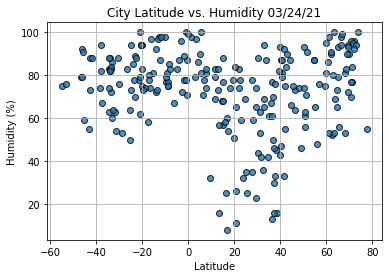

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Module: 6.3.3 Plot Latitude vs. Cloudiness


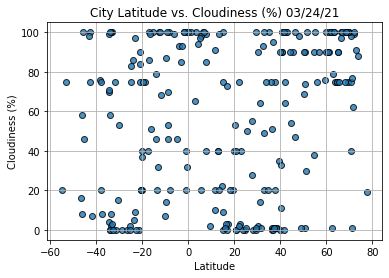

In [38]:
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness 
#(%)," and the y-axis label to "Cloudiness (%)."
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Module: 6.3.4 Plot Latitude vs. Wind Speed


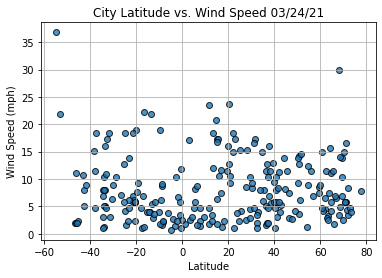

In [39]:
#Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to 
#"wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Module 6.4.1: Use Linear Regression to Find the Relationship Between Variables

In [40]:
#Linear regression is used to find a relationship between a dependent variable and one or more independent variables. 
#The trick is to find something (a dependent variable) that depends on something else (the independent variable) and plot 
#that relationship.
#Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 

#Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

#To determine if maximum temperature correlates to latitude, we can plot a linear regression line, a straight trendline 
#predicting the average y-value, or dependent variable, for a given x-value, or independent variable. This line can be 
#plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. For every x-value,
#or latitude we use in the equation, we will get a predicted temperature value.

#To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, 
#or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong 
#negative correlation. A correlation coefficient close to zero is no correlation.

# Module 6.4.1: Practice Using Linear Regression

In [41]:
#In a new cell of our random_numbers Jupyter Notebook file, we'll import the linear regression function from the SciPy 
#statistics module.

# Mondule 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

In [42]:
#Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather 
#parameters: maximum temperature, humidity, cloudiness, and wind speed.

#We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation 
#coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like 
#what we have used before.

# Perform linear regression.
#1. (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
#2. regress_values = x_values * slope + intercept

# Get the equation of the line.
#3. line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
#4. plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
#5. plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
#6. plt.annotate(line_eq, (10,40), fontsize=15, color="red")
#7. plt.xlabel('Latitude')
#8. plt.ylabel('Temp')
#9. plt.show()

# Module 6.4.2: Create a Linear Regression Function

In [43]:
  # Import linregress
from scipy.stats import linregress

In [44]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
#If we run this code there will be no output until we call the function with five parameters.

# Module 6.4.2: Create the Hemisphere DataFrames

In [45]:
#We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
#To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method 
#accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a
#specific row from a current DataFrame is row = df.loc[row_index].

#Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and 
#running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may 
#see a different city in your output cell than the one shown in the following image.
city_data_df = pd.read_csv("weather_data/cities.csv")

In [46]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City               Port Macquarie
Country                        AU
Date          2021-03-24 23:56:40
Lat                      -31.4333
Lng                       152.917
Max Temp                    80.01
Humidity                       54
Cloudiness                      0
Wind Speed                      3
Name: 13, dtype: object

In [47]:
#We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
#latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code 
#city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these 
#criteria.

city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
233    False
234     True
235     True
236     True
237     True
Name: Lat, Length: 238, dtype: bool

In [48]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use 
#the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter 
#city_data_df["Lat"] >= 0

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Fortuna,US,2021-03-25 00:02:13,40.5982,-124.1573,53.01,81,90,10.36
1,1,Khatanga,RU,2021-03-24 23:58:18,71.9667,102.5000,-8.23,96,99,3.47
3,3,Tupik,RU,2021-03-25 00:02:14,54.4253,119.9327,17.22,87,38,1.25
7,7,Kondinskoye,RU,2021-03-25 00:02:15,59.6481,67.4100,23.95,95,100,8.55
8,8,Albany,US,2021-03-24 23:55:45,42.6001,-73.9662,52.00,84,100,4.00
...,...,...,...,...,...,...,...,...,...,...
228,228,Saskylakh,RU,2021-03-24 23:55:26,71.9167,114.0833,-4.86,92,100,8.39
234,234,Diffa,NE,2021-03-25 00:03:17,13.3154,12.6113,81.88,16,99,12.06
235,235,Wisconsin Rapids,US,2021-03-25 00:03:18,44.3836,-89.8174,44.60,87,90,13.80
236,236,Guadix,ES,2021-03-25 00:02:01,37.2993,-3.1392,48.00,46,1,1.99


In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Fortuna,US,2021-03-25 00:02:13,40.5982,-124.1573,53.01,81,90,10.36
1,1,Khatanga,RU,2021-03-24 23:58:18,71.9667,102.5000,-8.23,96,99,3.47
3,3,Tupik,RU,2021-03-25 00:02:14,54.4253,119.9327,17.22,87,38,1.25
7,7,Kondinskoye,RU,2021-03-25 00:02:15,59.6481,67.4100,23.95,95,100,8.55
8,8,Albany,US,2021-03-24 23:55:45,42.6001,-73.9662,52.00,84,100,4.00


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Module 6.4.2: Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

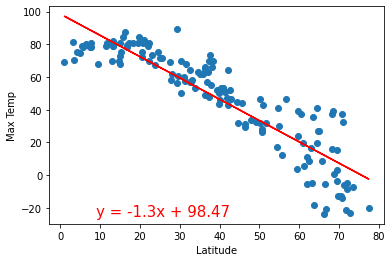

In [51]:
#To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
#Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
#northern_hemi_df DataFrame.

#Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for 
#the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the
#data.
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(9,-25))

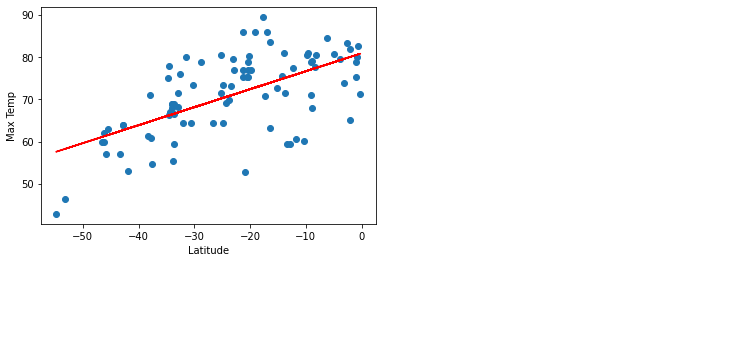

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(40,10))

# Module 6.4.2: Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

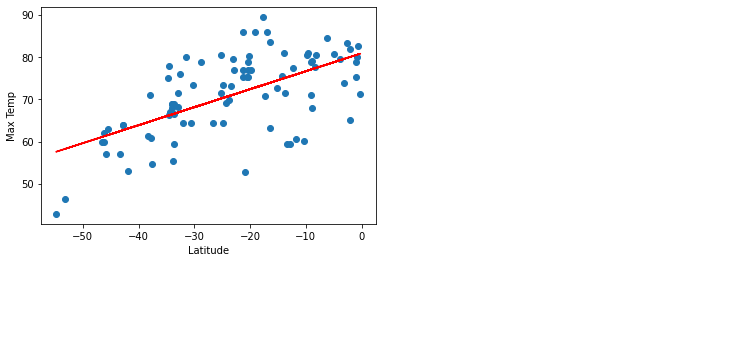

In [53]:
#To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern 
#Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(40,10))

In [54]:
#Findings: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value 
#is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here.
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the 
#equator the temperatures become cooler. Check the r-values for your plots. 

# Module 6.4.3: Find the Correlation Between Latitude and Percent Humidity

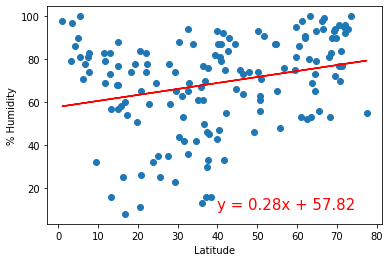

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

# Module 6.4.3: Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

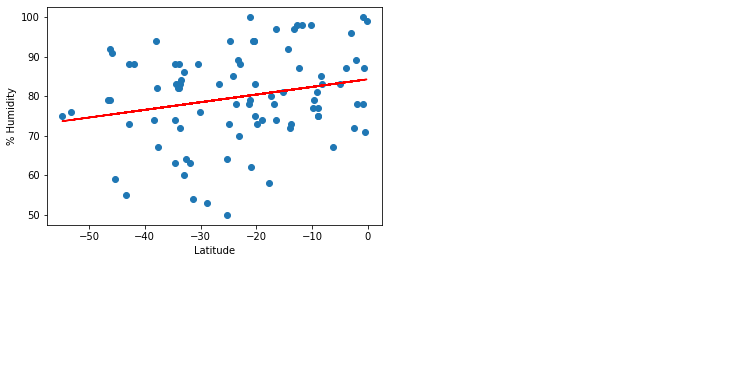

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [57]:
#Findings: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for 
#the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to 
#changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

# module 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

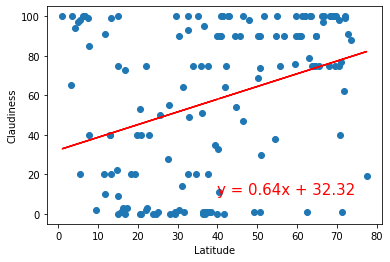

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Claudiness',(40,10))

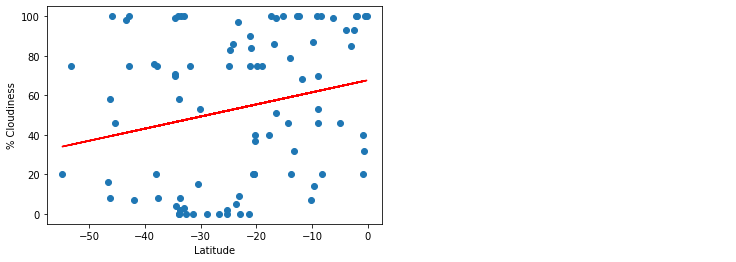

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [60]:
#Findings: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 
#for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that 
#cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the 
#r-values for your plots. 

# Module: 6.4.5 Find the Correlation Between Latitude and Wind Speed

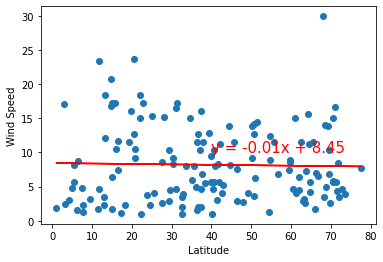

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

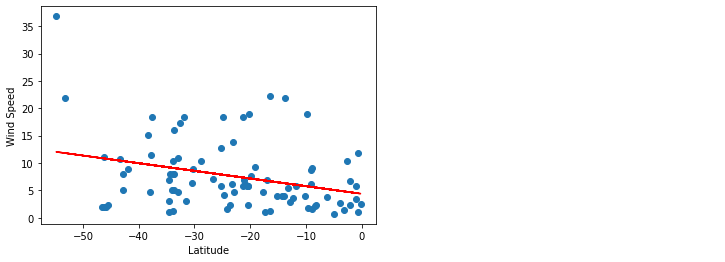

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

In [63]:
#Findings: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the 
#Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed 
#is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your 
#plots. 